**Mount Google Drive locally**

Mount your Google Drive on your runtime using an authorization code



In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
dataset_path = "/content/drive/My Drive/DATASETS/pokemon"
IMAGE_DIMS = (224, 224, 3)


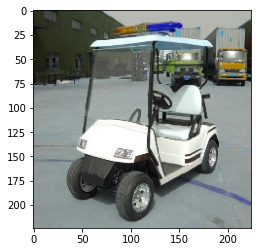

In [76]:
# load the image
image = cv2.imread(dataset_path + '/test/golfcart.jpg')
#image = cv2.imread(dataset_path + '/pikachu/00000000.jpg')
# pre-process the image for classification
image = cv2.resize(image, (IMAGE_DIMS[0], IMAGE_DIMS[1]))
import matplotlib.pyplot as plt
plt.imshow(image)


In [77]:
#image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
# Normalize the input image's pixel values to the range used when training the neural network
x = vgg16.preprocess_input(image)

In [78]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model = vgg16.VGG16()

In [79]:
# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

In [80]:
# print(predictions)

In [81]:
# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions)

print("Top predictions for this image:")

label = predicted_classes[0][0]
print(label)


Top predictions for this image:
('n03445924', 'golfcart', 0.9960063)


In [82]:
for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}".format(name, likelihood))

Prediction: golfcart - 0.996006
Prediction: forklift - 0.003515
Prediction: lawn_mower - 0.000148
Prediction: snowplow - 0.000069
Prediction: tow_truck - 0.000065
